# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

/tmp/ipykernel_113342/866361824.py:1: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  X = misc.ascent()


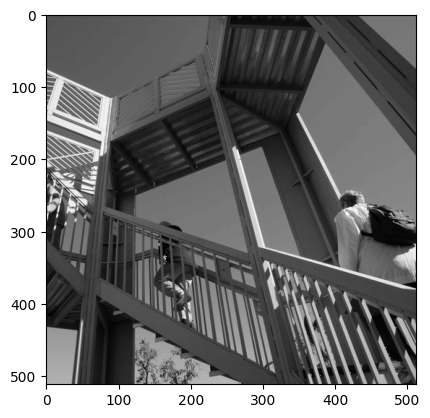

In [2]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

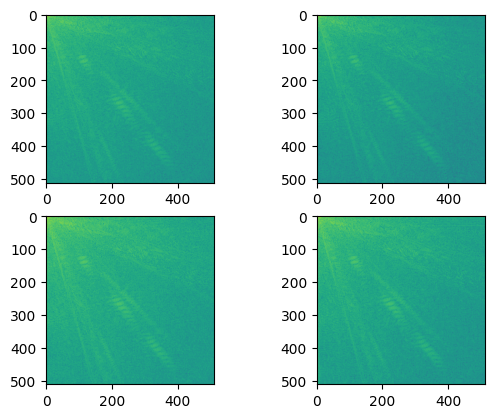

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

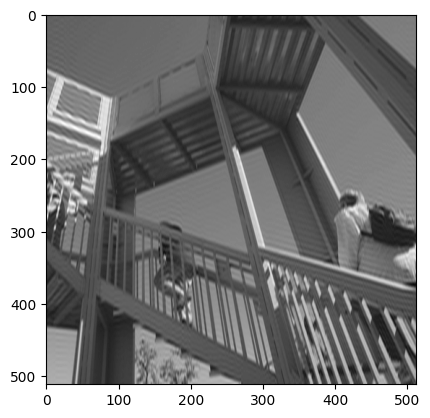

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

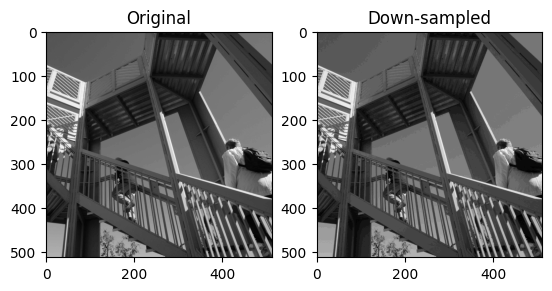

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

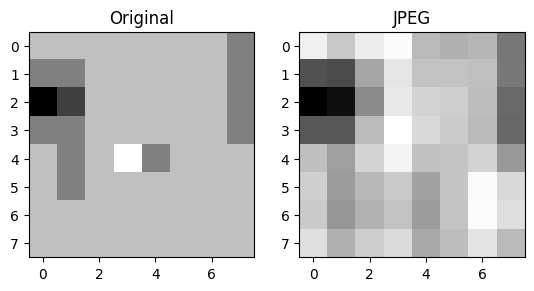

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

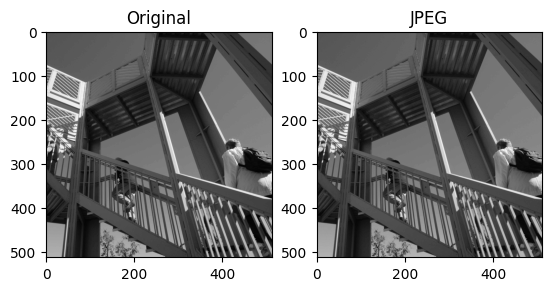

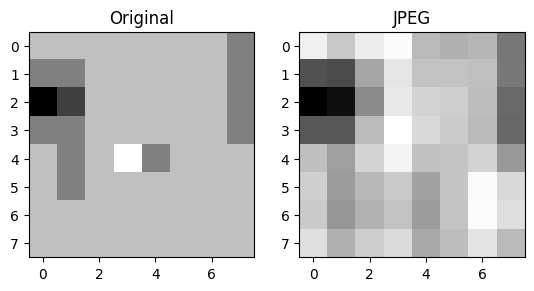

Componente în frecvență:250378
Componente în frecvență după cuantizare: 125029


In [7]:
# Encoding
def jpeg_block_encoding(x_param):
    y_return = dctn(x_param)
    y_jpeg_return = Q_jpeg*np.round(y_return/Q_jpeg)
    
    return [y_return, y_jpeg_return]


Y = np.zeros(X.shape)
Y_jpeg = np.zeros(X.shape)
for i in range(0, X.shape[0], 8):
    for j in range(0, X.shape[1], 8):
        x = X[i:i+8, j:j+8]
        y, y_jpeg = jpeg_block_encoding(x)
        
        Y[i:i+8, j:j+8] = y
        Y_jpeg[i:i+8, j:j+8] = y_jpeg
        

# Decoding
def jpeg_block_decoding(y_jpeg_param):
    y_return2 = idctn(y_jpeg_param)
    
    return y_return2

X2_jpeg = np.zeros(X.shape)

for i in range(0, X.shape[0], 8):
    for j in range(0, X.shape[1], 8):
        x_jpeg = jpeg_block_decoding(Y_jpeg[i:i+8, j:j+8])
        X2_jpeg[i:i+8, j:j+8] = x_jpeg

# Results
y_nnz = np.count_nonzero(Y)
y_jpeg_nnz = np.count_nonzero(Y_jpeg)

# Save image to jpeg
from PIL import Image
img = Image.fromarray(X2_jpeg.astype('uint8'), mode='L')
img.save('X_jpeg.jpg', quality=100)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X2_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

plt.subplot(121).imshow(X[:8,:8], cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X2_jpeg[:8,:8], cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

/tmp/ipykernel_113342/3479499432.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  rgb_image = misc.face()


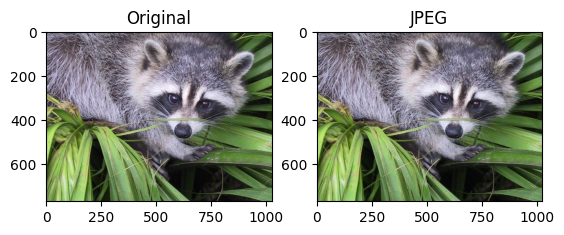

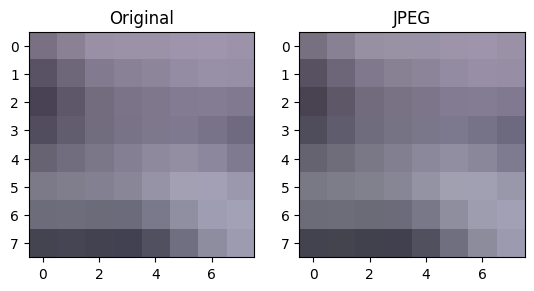

Componente în frecvență:1963853
Componente în frecvență după cuantizare: 444712
MSE: 2.8387552897135415


In [8]:
rgb_image = misc.face()

img = Image.fromarray(rgb_image.astype('uint8'), mode='RGB')

# Source: https://www.itu.int/rec/dologin_pub.asp?lang=e&id=T-REC-T.871-201105-I!!PDF-E&type=items Chapter 7

def rgb_to_ycbcr(rgb_image_param):
    rgb_image_param = np.clip(rgb_image_param, 0, 255) # Making sure the values are from 0 to 255
    
    ycbcr_image_return = np.zeros(rgb_image_param.shape)
    ycbcr_image_return.astype('float64')
    
    ycbcr_image_return[:, :, 0] = 0 + 0.299 * rgb_image_param[:, :, 0] + 0.587 * rgb_image_param[:, :, 1] + 0.114 * rgb_image_param[:, :, 2]
    ycbcr_image_return[:, :, 1] = 128 - 0.168736 * rgb_image_param[:, :, 0] - 0.331264 * rgb_image_param[:, :, 1] + 0.5 * rgb_image_param[:, :, 2]
    ycbcr_image_return[:, :, 2] = 128 + 0.5 * rgb_image_param[:, :, 0] - 0.418688 * rgb_image_param[:, :, 1] - 0.081312 * rgb_image_param[:, :, 2]
    
    ycbcr_image_return = np.clip(ycbcr_image_return, 0, 255) # Making sure the values are from 0 to 255
    ycbcr_image_return = ycbcr_image_return.astype('uint8')
        
    return ycbcr_image_return

def ycbcr_to_rgb(ycbcr_image_param):
    rgb_image_return = np.zeros(ycbcr_image_param.shape)
    rgb_image_return.astype('float64')
    
    rgb_image_return[:, :, 0] = ycbcr_image_param[:, :, 0] + 1.402 * (ycbcr_image_param[:, :, 2] - 128)
    rgb_image_return[:, :, 1] = ycbcr_image_param[:, :, 0] - 0.344136 * (ycbcr_image_param[:, :, 1] - 128) - 0.714136 * (ycbcr_image_param[:, :, 2] - 128)
    rgb_image_return[:, :, 2] = ycbcr_image_param[:, :, 0] + 1.772 * (ycbcr_image_param[:, :, 1] - 128)
    
    rgb_image_return = np.clip(rgb_image_return, 0, 255) # Making sure the values are from 0 to 255

    rgb_image_return = rgb_image_return.astype('uint8')
    
    return rgb_image_return

# Transform to YCbCr
X2 = rgb_to_ycbcr(rgb_image.copy())

# JPEG encoding
Y2 = np.zeros(X2.shape)
Y2_jpeg = np.zeros(X2.shape)
Y2_jpeg.astype('float64')
for dim in range(3):
    for row_img in range(0, X2.shape[0], 8):
        for col_img in range(0, X2.shape[1], 8):
            x = X2[row_img:row_img+8, col_img:col_img+8, dim]
            y, y_jpeg = jpeg_block_encoding(x)
            
            Y2[row_img:row_img+8, col_img:col_img+8, dim] = y
            Y2_jpeg[row_img:row_img+8, col_img:col_img+8, dim] = y_jpeg

# JPEG decoding
XColor_jpeg = np.zeros(X2.shape)
XColor_jpeg.astype('float64')
for dim in range(3):
    for row_img in range(0, X2.shape[0], 8):
        for col_img in range(0, X2.shape[1], 8):
            x_jpeg = jpeg_block_decoding(Y2_jpeg[row_img:row_img+8, col_img:col_img+8, dim])
            XColor_jpeg[row_img:row_img+8, col_img:col_img+8, dim] = x_jpeg

# Transform back to RGB
XColor_jpeg = ycbcr_to_rgb(XColor_jpeg.copy())

# Results
y_nnz = np.count_nonzero(Y2)
y_jpeg_nnz = np.count_nonzero(Y2_jpeg)

# Save image to jpeg
img = Image.fromarray(XColor_jpeg.astype('uint8'), mode='RGB')
img.save('XColor_jpeg.jpg', quality=100, subsampling=0)

plt.subplot(121).imshow(rgb_image, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(XColor_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

plt.subplot(121).imshow(rgb_image[:8,:8], cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(XColor_jpeg[:8,:8], cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# MSE between original and JPEG
mse = np.mean((rgb_image - XColor_jpeg)**2)
print('MSE: ' + str(mse))

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

/tmp/ipykernel_113342/575445200.py:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  rgb_image = misc.face()


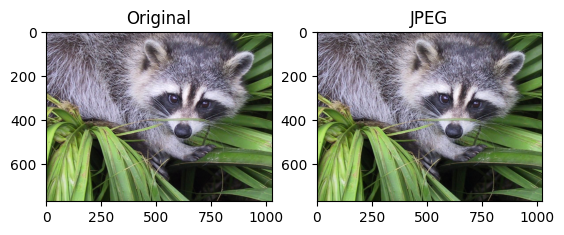

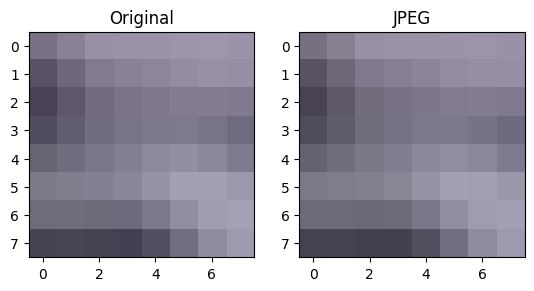

Componente în frecvență:1963853
Componente în frecvență după cuantizare: 918079
MSE: 2.7974671257866754


In [9]:
# MSE threshold
mse_threshold = 50

# JPEG encoding
rgb_image = misc.face()
X2 = rgb_to_ycbcr(rgb_image.copy())
Y3 = np.zeros(X2.shape)
Y3_jpeg = np.zeros(X2.shape)

for dim in range(3):
    for i in range(0, X2.shape[0], 8):
        for j in range(0, X2.shape[1], 8):
            x = X2[i:i+8, j:j+8, dim]
            y, y_jpeg = jpeg_block_encoding(x)
            
            if np.mean((y - y_jpeg)**2) < mse_threshold:
                Y3[i:i+8, j:j+8, dim] = y
                Y3_jpeg[i:i+8, j:j+8, dim] = y_jpeg
            else:
                Y3[i:i+8, j:j+8, dim] = y
                Y3_jpeg[i:i+8, j:j+8, dim] = y
                
# JPEG decoding
XColor2_jpeg = np.zeros(X2.shape)

for dim in range(3):
    for i in range(0, X2.shape[0], 8):
        for j in range(0, X2.shape[1], 8):
            x_jpeg = jpeg_block_decoding(Y3_jpeg[i:i+8, j:j+8, dim])
            XColor2_jpeg[i:i+8, j:j+8, dim] = x_jpeg
            
# Transform back to RGB
XColor2_jpeg = ycbcr_to_rgb(XColor2_jpeg.copy())

# Results
y_nnz = np.count_nonzero(Y3)
y_jpeg_nnz = np.count_nonzero(Y3_jpeg)

# Save image to jpeg
img = Image.fromarray(XColor2_jpeg.astype('uint8'), mode='RGB')
img.save('XColor2_jpeg.jpg', quality=100, subsampling=0)

plt.subplot(121).imshow(rgb_image, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(XColor2_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

plt.subplot(121).imshow(rgb_image[:8,:8], cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(XColor2_jpeg[:8,:8], cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# MSE between original and JPEG
mse = np.mean((rgb_image - XColor2_jpeg)**2)
print('MSE: ' + str(mse))

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

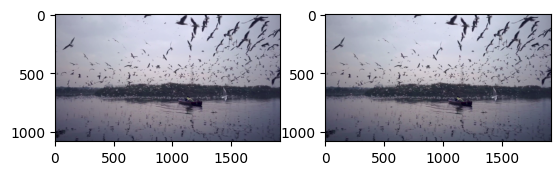

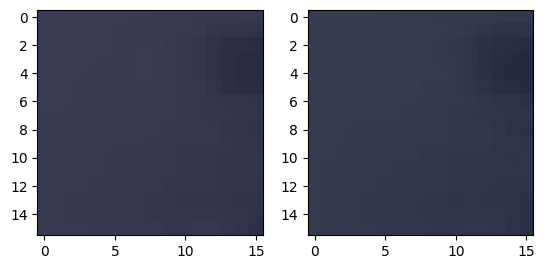

Componente în frecvență:1617537
Componente în frecvență după cuantizare: 578317
MSE: 2.746690779320988


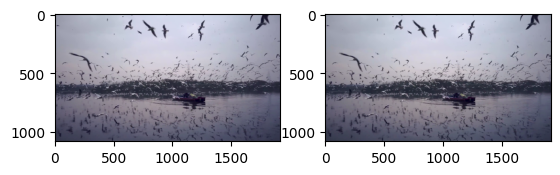

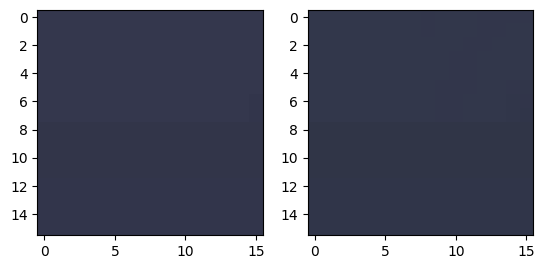

Componente în frecvență:2276157
Componente în frecvență după cuantizare: 728955
MSE: 2.7174430941358025


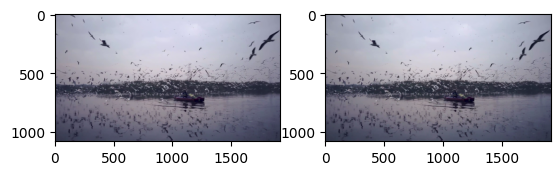

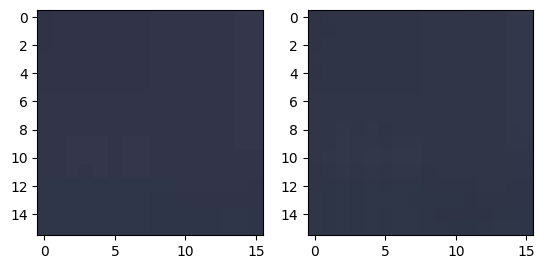

Componente în frecvență:2194699
Componente în frecvență după cuantizare: 698650
MSE: 2.8259678819444445


In [10]:
import cv2

# If directory frames does not exist, create it
import os
if not os.path.exists('frames'):
    os.makedirs('frames')

# MSE threshold
mse_threshold = 300

# Source: https://www.pexels.com/video/video-footage-of-flying-seagulls-4713259/
video_clip = cv2.VideoCapture('video_clip.mp4')

compressed_jpegs = []

def frame_to_jpeg(Xframe):
    # Transform to YCbCr
    X_in_frame = rgb_to_ycbcr(Xframe.copy())

    # JPEG encoding
    Y_in_frame = np.zeros(X_in_frame.shape)
    Y_jpeg = np.zeros(X_in_frame.shape)
    for dim in range(3):
        for i in range(0, X_in_frame.shape[0], 8):
            for j in range(0, X_in_frame.shape[1], 8):
                x = X_in_frame[i:i+8, j:j+8, dim]
                y, y_jpeg = jpeg_block_encoding(x)
                
                if np.mean((y - y_jpeg)**2) < mse_threshold:
                    Y_in_frame[i:i+8, j:j+8, dim] = y
                    Y_jpeg[i:i+8, j:j+8, dim] = y_jpeg
                else:
                    Y_in_frame[i:i+8, j:j+8, dim] = y
                    Y_jpeg[i:i+8, j:j+8, dim] = y
            
    # JPEG decoding
    XColor_jpeg = np.zeros(X_in_frame.shape)
    for dim in range(3):
        for i in range(0, X_in_frame.shape[0], 8):
            for j in range(0, X_in_frame.shape[1], 8):
                x_jpeg = jpeg_block_decoding(Y_jpeg[i:i+8, j:j+8, dim])
                XColor_jpeg[i:i+8, j:j+8, dim] = x_jpeg

    # Transform back to RGB
    XColor_jpeg = ycbcr_to_rgb(XColor_jpeg)
    
    y_nnz = np.count_nonzero(Y_in_frame)
    y_jpeg_nnz = np.count_nonzero(Y_jpeg)
    
    return [XColor_jpeg, y_nnz, y_jpeg_nnz]

fps = video_clip.get(cv2.CAP_PROP_FPS)


# First 3 seconds
success, frame = video_clip.read()

frame_count = 0
             
while success:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    current_frame_jpeg, y_nnz, y_jpeg_nnz = frame_to_jpeg(frame)
    compressed_jpegs.append(current_frame_jpeg)
    img_jpg = Image.fromarray(compressed_jpegs[frame_count].astype('uint8'), mode='RGB')
    img_jpg.save('frames/frame-jpg-' + str(frame_count) + '.jpg', 'JPEG', quality=100, subsampling=0)
    
    # img_orig = Image.fromarray(frame.astype('uint8'), mode='RGB')
    # img_orig.save('frames/frame-' + str(frame_count) + '.jpg', 'JPEG', quality=100)
    
    if frame_count % fps == 0:
        plt.subplot(121).imshow(frame.astype('uint8'), cmap=plt.cm.gray)
        plt.subplot(122).imshow(compressed_jpegs[frame_count].astype('uint8'), cmap=plt.cm.gray)
        plt.show()
        
        plt.subplot(121).imshow(frame.astype('uint8')[-32:-16,-32:-16], cmap=plt.cm.gray)
        plt.subplot(122).imshow(compressed_jpegs[frame_count].astype('uint8')[-32:-16,-32:-16], cmap=plt.cm.gray)
        plt.show()
        
        print('Componente în frecvență:' + str(y_nnz) +'\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))
        
        mse = np.mean((frame - compressed_jpegs[frame_count])**2)
        print('MSE: ' + str(mse))
    
    success, frame = video_clip.read()
    frame_count += 1
    
    if frame_count == 3*fps:
        break

video_clip.release()

In [11]:
# Save video
height, width, layers = compressed_jpegs[0].shape
size = (width,height)

import subprocess as sp

# Check if ffmpeg is installed and play video
try:
    sp.check_call(['ffmpeg', '-version'])
    ffmpeg_proc = sp.Popen(['ffmpeg', '-y', '-f', 'image2pipe', '-vcodec', 'mjpeg', '-r', str(fps), '-i', '-', '-vcodec', 'libx264', '-q:v', '1', '-r', str(fps), 'compressed_video.mp4'], stdin=sp.PIPE)

    for i in range(len(compressed_jpegs)):
        img = Image.fromarray(compressed_jpegs[i].astype('uint8'), mode='RGB')
        img.save(ffmpeg_proc.stdin, 'JPEG')
        
    ffmpeg_proc.stdin.close()
    ffmpeg_proc.wait()
except sp.CalledProcessError:
    print('ffmpeg not installed')


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [12]:
# Play video
from IPython.display import Video
Video("compressed_video.mp4")

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.